# Diversity Scatterplots

```
Dustin Michels
November 7, 2017
BIOL 338, Carleton College
```

This script attempst to calculate linear regression for each of five metadata attributes plotted against the Shannon-Weiner Index.

---

## Load Data from CSVs

In [1]:
import pandas as pd

In [2]:
# Metadata for all class samples
metadata = pd.read_csv('project_datasets_metadata.csv')
metadata = metadata.drop(
    ['Student','Filename', 'Downloaded', 'Link to info'], axis=1)

# Show first and last items
display(metadata.head(n=3))
display(metadata.tail(n=3))

,Region,Run ID,Sample details,Lat/Long,Depth (m),Temp (C),Chlorophyl (mg Chl/m3),Nitrate (µmol/L),Oxygen (µmol/Kg),Salinity (psu)
0,Southern Ocean (near Antarctica),ERR599104,deep chlorophyll maximum layer,"-62.2231 , -49.2139",90,-0.78154,0.540091,33.109231,325.402987,34.319478
1,Southern Ocean (near Antarctica),ERR599090,surface water layer,"-62.0385 , -49.5290",5,0.67108,0.065273,27.501159,343.437300,34.353880
2,Southern Ocean (near Antarctica),ERR599008,mesopelagic zone,"-61.9689 , -49.5017",790,0.45883,0.010087,38.821249,203.839400,34.679960


,Region,Run ID,Sample details,Lat/Long,Depth (m),Temp (C),Chlorophyl (mg Chl/m3),Nitrate (µmol/L),Oxygen (µmol/Kg),Salinity (psu)
8,North Pacific,ERR599142,surface water layer,"31.5213 , -158.9958",5,25.173925,0.057131,-0.979589,197.682417,35.181842
9,North Atlantic (off the coast of Portugal),ERR599078,surface water layer,"43.6792 , -16.8344",5,14.280650,0.238225,2.999226,243.148000,35.986042
10,Arabian Sea,ERR599031,mesopelagic zone,"20.8457 , 63.5851",600,12.066048,0.005649,31.802451,1.639990,35.693546


In [3]:
# diversity summary has shannon-weiner index for my samples
diversity_summary = pd.read_csv('diversity_summary.csv')
display(diversity_summary)

,label,run_id,total_num_sequences,species_richness,SW_index
0,01_dcm_SernOcean,ERR599104,8732,9,1.003611
1,02_surface_SernOcean,ERR599090,9399,5,0.974620
2,03_meso_SPacific,ERR598999,9539,20,1.714318
3,04_surface_NAtlantic,ERR599078,9551,15,1.544702
4,05_dcm_SPacific,ERR598948,9588,17,1.349562
5,06_surface_SPacific,ERR598992,9706,13,1.513954


## Merge Data Together

In [4]:
# Merge on run_id
data = diversity_summary.merge(
    metadata, left_on='run_id', right_on='Run ID')

# Drop unneeded values
data = data.drop(
    ['total_num_sequences', 'species_richness',
     'Run ID', 'Region', 'label', 'Lat/Long', 'Sample details'],
    axis=1)

# Display
display(data)

,run_id,SW_index,Depth (m),Temp (C),Chlorophyl (mg Chl/m3),Nitrate (µmol/L),Oxygen (µmol/Kg),Salinity (psu)
0,ERR599104,1.003611,90,-0.781540,0.540091,33.109231,325.402987,34.319478
1,ERR599090,0.974620,5,0.671080,0.065273,27.501159,343.437300,34.353880
2,ERR598999,1.714318,600,7.212238,0.000000,42.532050,38.115125,34.580675
3,ERR599078,1.544702,5,14.280650,0.238225,2.999226,243.148000,35.986042
4,ERR598948,1.349562,115,24.696250,0.295808,2.333576,179.916875,36.097575
5,ERR598992,1.513954,5,26.544130,0.166512,3.986359,186.240700,35.366200


## Make Charts

In [5]:
# Imports
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

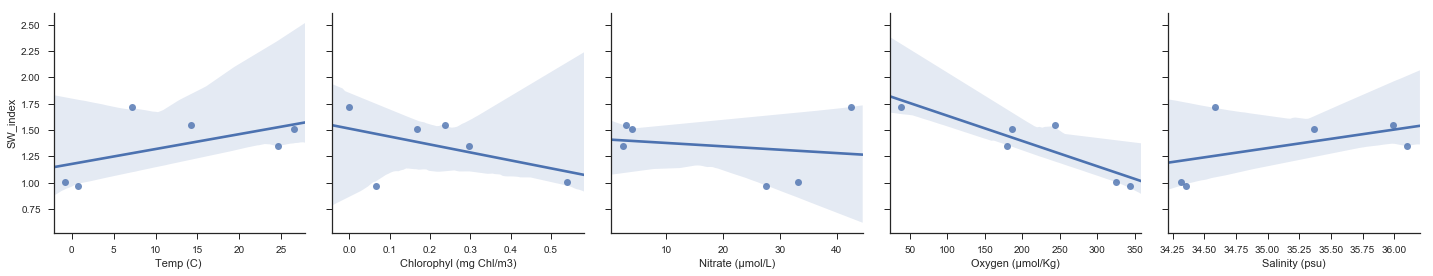

In [6]:
# Create Charts
x_data = data.columns.drop(['run_id', 'SW_index', 'Depth (m)'])
y_data = ['SW_index']
p = sns.pairplot(data, kind="reg", x_vars=x_data, y_vars=y_data, size=4)

In [7]:
p.savefig('scatter_plots.png')